## Observations and Insights 


##### 1. Based on the analysis, the sex of mice was very close to an even distrubution. The sex of the mice did not play a significant role in the performance of the treatments.<b><b> 
<b><b>
##### 2. Analysis will show that higher weight of the mouse had a higher tumor volume. This result suggests that there is a correlation to with higher weight and higher tumor volumes.<b><b>
<b><b>
##### 3. Within the analysis of tumor volumes of four treaments 'Ramicane, Capomulin, Infubinol, and Ceftamin, Ramicane is the treatment with the lowest tumor volume. This analysis suggests that Ramicane could be the most effective of the four drugs      

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
big_pharma_df = pd.merge(mouse_metadata,study_results, how = 'left', on = ['Mouse ID', 'Mouse ID'] )

# Display the data table for preview
big_pharma_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = big_pharma_df['Mouse ID'].nunique()
mice

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
drop_mouse =  big_pharma_df.loc[big_pharma_df.duplicated(['Mouse ID','Timepoint'],keep=False),:]

drop_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
drop_mouse_id = drop_mouse["Mouse ID"].unique()

drop_mouse_id 

array(['g989'], dtype=object)

In [5]:
# Create a clean dataframe with the duplicate mouse ID removed. This will be the main data source going forward. 
#big_pharma_df_clean = big_pharma_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

big_pharma_df_clean = big_pharma_df[big_pharma_df["Mouse ID"].isin(drop_mouse_id) == False]


big_pharma_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(big_pharma_df_clean['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_df = big_pharma_df_clean.groupby(['Drug Regimen'])
regimen_mean = regimen_df['Tumor Volume (mm3)'].mean()
regimen_median = regimen_df['Tumor Volume (mm3)'].median()
regimen_var = regimen_df['Tumor Volume (mm3)'].var()                                  
regimen_std = regimen_df['Tumor Volume (mm3)'].std()                                    
regimen_sem = regimen_df['Tumor Volume (mm3)'].sem()

regimen_stats_df = pd.DataFrame({'T Volume Mean':regimen_mean,'T Volume Median':regimen_median,\
                                 'T Volume Variance':regimen_var,'T Volume STD':regimen_std,'T Volume SEM':regimen_sem})

regimen_stats_df


,T Volume Mean,T Volume Median,T Volume Variance,T Volume STD,T Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_table = big_pharma_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

regimen_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
## Take a look at the sum of the tests for each regimen. This will be used to plot and validate our bar chart
timepoints_test = regimen_df['Timepoint'].count()
timepoints_test

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

## Bar and Pie Charts

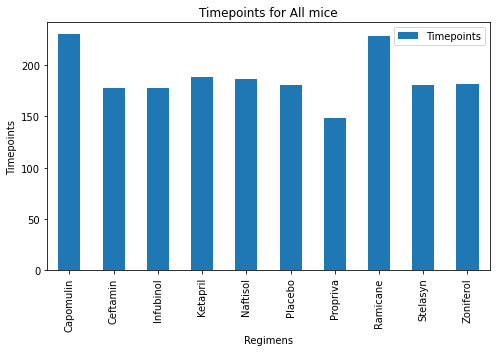

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_test.plot(kind='bar', figsize=(7,5))

plt.title("Timepoints for All mice")
plt.xlabel("Regimens")
plt.ylabel("Timepoints")
plt.legend(['Timepoints'])
plt.tight_layout()

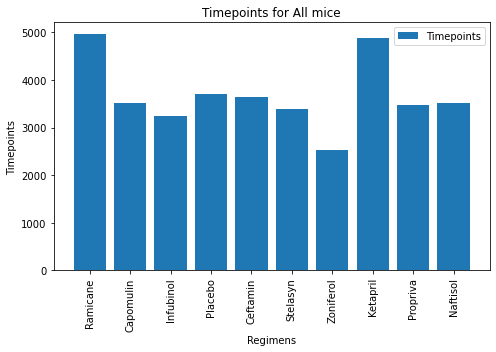

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Timepoints = regimen_df['Timepoint'].sum()
x_axis = np.arange(len(Timepoints))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,5))
plt.bar(x_axis, Timepoints, alpha=1 , align='center')
plt.xticks(tick_locations, big_pharma_df['Drug Regimen'].unique(), rotation='vertical' )

plt.title("Timepoints for All mice")
plt.xlabel("Regimens")
plt.ylabel("Timepoints")
plt.legend(['Timepoints'])
plt.tight_layout()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

## Creating a clean copy of the original clean dataframe. This way we can reuse the big_pharma_df_cleanv2 if we need to
pharma_df = big_pharma_df_clean.copy()



Text(0.5, 1.0, 'Distribution of female versus male mice')

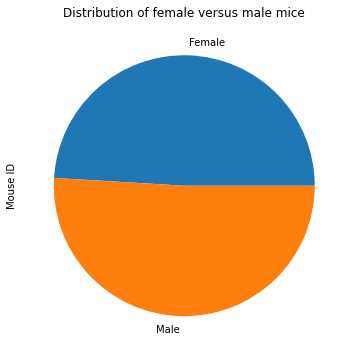

In [13]:
pie_data = pharma_df.groupby(['Sex'])

pplot = pie_data['Mouse ID'].count().plot.pie(subplots=True, figsize=(11, 6))

plt.title("Distribution of female versus male mice")

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# These are the labels for the pie chart
labels = ['Female', 'Male']

# These would be the values for the pie chart
values = [values for values in pie_data['Mouse ID'].count()]

colors = ['yellow','blue']

explode = (0.1,0)

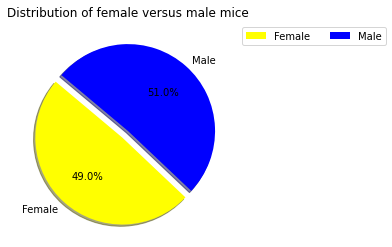

In [15]:
# Creating the pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of female versus male mice")

plt.legend(bbox_to_anchor =(1, 1), ncol = 2)

## Quartiles, Outliers and Boxplots

In [16]:
## Creating a copy of the orignial dataframe to allow manipulation of the data while keeping the option to revert
## to the original source 
new_pharma = big_pharma_df_clean.copy()

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

## Creating a list that will be used to filter the Regimens
og_regs = new_pharma['Drug Regimen']
reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

## Filtering the Drug Regimen column using Pandas chaining and isin() function to return the columns and rows in
## relation to the desired regimens
new_pharma_reg = new_pharma[og_regs.isin(reg_list)]

## Check to see that only the desired drug regimens remain the new data frame 
print(new_pharma_reg['Drug Regimen'].unique())



['Ramicane' 'Capomulin' 'Infubinol' 'Ceftamin']


In [17]:
# Start by getting the last (greatest) timepoint for each mouse

new_pharma_maxtimepoints = new_pharma_reg.groupby(['Mouse ID'], sort=False)['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pharma_df_merged = new_pharma_reg.merge(new_pharma_maxtimepoints, on=['Mouse ID','Timepoint'], how='inner')

pharma_df_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [25]:
# Put treatments into a list for a for loop (and later for plot labels)

treatments = pharma_df_merged['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for volume in pharma_df_merged['Tumor Volume (mm3)']:
    tumor_vol.append(volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = pharma_df_merged['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

print("--------------------------------------")
print(" ")
    # Locate the rows which contain mice on each drug and get the tumor volumes
treatments_narrow_df = pd.DataFrame({"Treatment":pharma_df_merged['Drug Regimen'], \
                                     "Mouse ID":pharma_df_merged['Mouse ID'],\
                                    "Tumor Volume":pharma_df_merged['Tumor Volume (mm3)']})    
    
    # add subset 
Ramicane_sub = treatments_narrow_df[treatments_narrow_df["Treatment"].isin(["Ramicane"])]
Capomulin_sub = treatments_narrow_df[treatments_narrow_df["Treatment"].isin(["Capomulin"])]
Infubinol_sub = treatments_narrow_df[treatments_narrow_df["Treatment"].isin(["Infubinol"])]
Ceftamin_sub = treatments_narrow_df[treatments_narrow_df["Treatment"].isin(["Ceftamin"])]

    # Determine outliers using upper and lower bounds
    
    ## evaluate the lower and upper bounds for each trement regimen
Ramicane_sub_quartiles = Ramicane_sub['Tumor Volume'].quantile([0.25,0.5,0.75])
Ramicane_sub_lowerq = Ramicane_sub_quartiles[0.25]
Ramicane_sub_upperq = Ramicane_sub_quartiles[0.75]
Ramicane_sub_iqr = Ramicane_sub_upperq-Ramicane_sub_lowerq   
Ramicane_sub_lower_bound = Ramicane_sub_lowerq - (1.5*Ramicane_sub_iqr)
Ramicane_sub_upper_bound = Ramicane_sub_upperq + (1.5*Ramicane_sub_iqr)
print(f"Ramicane values below {Ramicane_sub_lower_bound} could be outliers")
print(f"Ramicane values above {Ramicane_sub_upper_bound} could be outliers")
print("--------------------------------------")
print(" ")

Capomulin_sub_quartiles = Capomulin_sub['Tumor Volume'].quantile([0.25,0.5,0.75])
Capomulin_sub_lowerq = Capomulin_sub_quartiles[0.25]
Capomulin_sub_upperq = Capomulin_sub_quartiles[0.75]
Capomulin_sub_iqr = Capomulin_sub_upperq-Capomulin_sub_lowerq    
Capomulin_sub_lower_bound = Capomulin_sub_lowerq - (1.5*Capomulin_sub_iqr)
Capomulin_sub_upper_bound = Capomulin_sub_upperq + (1.5*Capomulin_sub_iqr)
print(f"Capomulin values below {Capomulin_sub_lower_bound} could be outliers")
print(f"Capomulin values above {Capomulin_sub_upper_bound} could be outliers")
print("--------------------------------------")
print(" ")


Infubinol_sub_quartiles = Infubinol_sub['Tumor Volume'].quantile([0.25,0.5,0.75])
Infubinol_sub_lowerq = Infubinol_sub_quartiles[0.25]
Infubinol_sub_upperq = Infubinol_sub_quartiles[0.75]
Infubinol_sub_iqr = Infubinol_sub_upperq-Infubinol_sub_lowerq    
Infubinol_sub_lower_bound = Infubinol_sub_lowerq - (1.5*Infubinol_sub_iqr)
Infubinol_sub_upper_bound = Infubinol_sub_upperq + (1.5*Infubinol_sub_iqr)
print(f"Infubinol values below {Infubinol_sub_lower_bound} could be outliers")
print(f"Infubinol values above {Infubinol_sub_upper_bound} could be outliers")
print("--------------------------------------")
print(" ")

Ceftamin_sub_quartiles = Ceftamin_sub['Tumor Volume'].quantile([0.25,0.5,0.75])
Ceftamin_sub_lowerq = Ceftamin_sub_quartiles[0.25]
Ceftamin_sub_upperq = Ceftamin_sub_quartiles[0.75]
Ceftamin_sub_iqr = Ceftamin_sub_upperq-Ceftamin_sub_lowerq    
Ceftamin_sub_lower_bound = Ceftamin_sub_lowerq - (1.5*Ceftamin_sub_iqr)
Ceftamin_sub_upper_bound = Ceftamin_sub_upperq + (1.5*Ceftamin_sub_iqr)
print(f"Ceftamin values below {Ceftamin_sub_lower_bound} could be outliers")
print(f"Ceftamin values above {Ceftamin_sub_upper_bound} could be outliers")
print("--------------------------------------")
print(" ")



## Utilize loops for each treatment to determine whether there may be an outlier in each category and print 
## the result if one is found 
for volume in Ramicane_sub["Tumor Volume"]:
    if volume < Ramicane_sub_lower_bound:
        print(f"Ramicane has an outlier of {volume}")
    elif volume > Ramicane_sub_upper_bound:
        print(f"Ramicane has an outlier of {volume}")
        
for volume in Capomulin_sub["Tumor Volume"]:
    if volume < Capomulin_sub_lower_bound:
        print(f"Capomulin has an outlier of {volume}")
    elif volume > Capomulin_sub_upper_bound:
        print(f"Capomulin has an outlier of {volume}")

for volume in Infubinol_sub["Tumor Volume"]:
    if volume < Infubinol_sub_lower_bound:
        print(f"Infubinol has an outlier of {volume}")
    elif volume > Infubinol_sub_upper_bound:
        print(f"Infubinol has an outlier of {volume}")
        
for volume in Ceftamin_sub["Tumor Volume"]:
    if volume < Ceftamin_sub_lower_bound:
        print(f"Ceftamin has an outlier of {volume}")
    elif volume > Ceftamin_sub_upper_bound:
        print(f"Ceftamin has an outlier of {volume}")
print("--------------------------------------")
print(" ")


The lower quartile of Tumor Volume is: 37.1877438025
The upper quartile of Tumor Volume is: 59.930261755
The interquartile range of Tumor Volume is: 22.742517952499995
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
--------------------------------------
 
Ramicane values below 17.912664470000003 could be outliers
Ramicane values above 54.30681135 could be outliers
--------------------------------------
 
Capomulin values below 20.70456164999999 could be outliers
Capomulin values above 51.83201549 could be outliers
--------------------------------------
 
Infubinol values below 36.83290494999999 could be outliers
Infubinol values above 82.74144559000001 could be outliers
--------------------------------------
 
Ceftamin values below 25.355449580000002 could be outliers
Ceftamin values above 87.66645829999999 could be outliers
--------------------------------------
 
Infubinol has an outlier of 36.3213458
-----------------------------

Text(0.5, 0, 'Treatments')

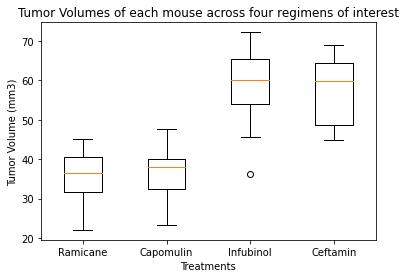

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


box_plots_data = {'Ramicane':Ramicane_sub['Tumor Volume'],'Capomulin': Capomulin_sub['Tumor Volume'], \
                               'Infubinol': Infubinol_sub['Tumor Volume'], 'Ceftamin': Ceftamin_sub['Tumor Volume']}
fig, ax = plt.subplots()
ax.boxplot(box_plots_data.values())
ax.set_xticklabels(box_plots_data.keys())
plt.title('Tumor Volumes of each mouse across four regimens of interest' )
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Treatments")

## Line and Scatter Plots

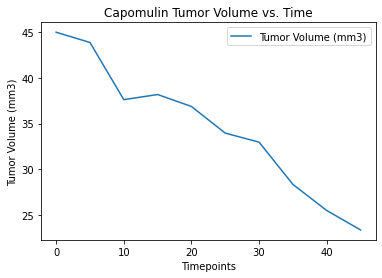

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Filter for mouse ID s185 using the original dataframe
Capomulin_TVolume_Data = big_pharma_df_clean[big_pharma_df_clean["Drug Regimen"].isin(["Capomulin"])]
Capomulin_TVolume_DataV2 = Capomulin_TVolume_Data[Capomulin_TVolume_Data["Mouse ID"].isin(["s185"])]
Capomulin_TVolume_DataV2

lines = Capomulin_TVolume_DataV2.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Capomulin Tumor Volume vs. Time' )
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(['Tumor Volume (mm3)'])

In [21]:
Capomulin_TVolume_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


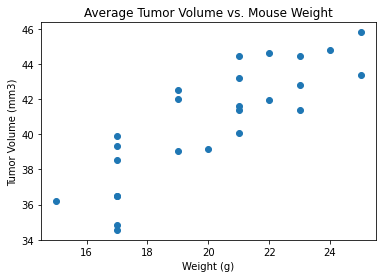

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter on the Capomulin 
Capomulin_TVolume_Scatter = Capomulin_TVolume_Data.filter(['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)'])
Capomulin_TVolume_Scatter_data = Capomulin_TVolume_Scatter.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_TVolume_Scatter_data['Weight (g)'],Capomulin_TVolume_Scatter_data['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight' )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Tumor Volume and Weight is {round(st.pearsonr(Capomulin_TVolume_Scatter_data['Tumor Volume (mm3)'],Capomulin_TVolume_Scatter_data['Weight (g)'])[0],2)}")

The correlation coefficient between Tumor Volume and Weight is 0.84


The r-squared is: 0.7088568047708723


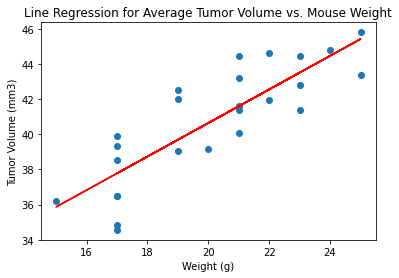

In [24]:
# plot the linear regression model

x_values = Capomulin_TVolume_Scatter_data['Weight (g)']
y_values = Capomulin_TVolume_Scatter_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Line Regression for Average Tumor Volume vs. Mouse Weight' )
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()